# ***Simple Face Detection using OpenCV***



---





We all have notice that Facebook recently add a feature where it automatically identify faces of our friends, colleagues and family and tag them. In the old days, Facebook used to make you to tag your friends in photos by clicking on them and typing in their name. Now as soon as you upload a photo, Facebook tags everyone for you like magic:

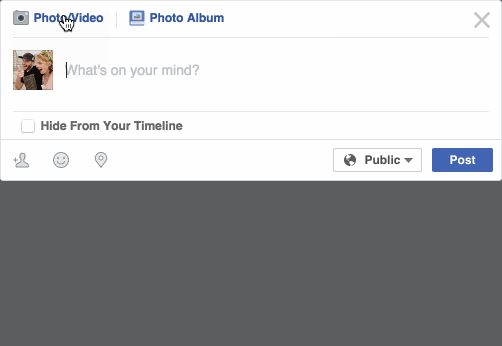



We can see this amazing technological advancement of Face Identification in a lot of places. So, Here is a Simple project of Face Detection where we use OpenCV. 

OpenCV is a cross-platform library using which we can develop real-time computer vision applications. It mainly focuses on image processing, video capture and analysis including features like face detection and object detection.

For building this project we need the basic idea of 3 topics-


1.   Convolutional Neural Network (CNN)
2.   OpenCV 
3.   Python (Most of the code written in Python)


Let's Start with the Project and explanation:

Here we use Google Colab because it comes with preinstalled GPU and CPU.

So, At first we have install Face-Detection Library in this machine.

We can install this library using this command-

In [ ]:
!pip install face_recognition

Now for face detection we need to two datasets of known faces with their name and photo.

So in this following command we are creating a directory for known faces using- 

```
!mkdir <directory_name>
```
And then we are importing the images from internet and save them with their name with following this method-


```
!wget <Link for image> -O <directory_name/Face_name.jpg>
```
Here we use -O for changing the name and save the file in that directory. And don't foget to mention the extention for image.



In [ ]:
!mkdir Known
!wget https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg -O Known/elon_musk.jpg
!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg -O Known/bill_gates.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Mark_Zuckerberg_F8_2019_Keynote_%2832830578717%29_%28cropped%29.jpg/220px-Mark_Zuckerberg_F8_2019_Keynote_%2832830578717%29_%28cropped%29.jpg -O Known/mark_zuckerberg.jpg

In this case we create a directory for unknown faces.

Here unknown face doesn't means a complete different person but the same person of known directory. Here we just have to save them without their name but with tags.

The code written in same process as above.

In [ ]:
!mkdir Unknown
!wget https://img.etimg.com/thumb/msid-77029048,width-300,imgsize-110701,,resizemode-4,quality-100/untitled-12.jpg -O Unknown/1.jpg
!wget https://img.jakpost.net/c/2018/11/06/2018_11_06_58019_1541492672._large.jpg -O Unknown/2.jpg
!wget https://www.aviationtoday.com/wp-content/uploads/2020/03/elon-musk_sat20-1024x683.jpg -O Unknown/3.jpg

The main code snippet for identifying the faces from Known and Unknown faces.


The explanation of each line presented as comment in code.


In [ ]:
import face_recognition   # Improting Library for face Recognation where many features fot face detection is already defined
import cv2  # Importing Computer Vision Library
import os  # Importing Operating System Library to use of operating system dependent functionality
from google.colab.patches import cv2_imshow # cv2_imshow is used to show images in computer vision network but to use it properly in google colab we add a google colab patch

def read_img(path):      # this Function is used to resize the images. 
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500            # we set the pixel to 500 so no matter what the size of a image, we resize it to 500 pixel.
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img, (width, height)) #cv2.resize is a predefined function to resize the images

known_encodings = []                                # list to store all our encodings for our known images.
known_names = []                                    # list to store the names of file images of known directory
known_dir = 'Known'                                 # putting directory name in variable

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)            # reading every image of file using read image function to resize them and create path to every image
  img_enc = face_recognition.face_encodings(img)[0] # face_recognition library has pre-defined function face_encoding to create encoding of every image. Here we have only 1 images of every person so we put [0] to create only one value of encoding.
  known_encodings.append(img_enc)                   # Add this img_enc value to known_encodings list 
  known_names.append(file.split('.')[0])            # We are spliting the names of images because we don't want to show .jpg extension when it identifies the face

unknown_dir = 'Unknown'                             # Creating a variable for unknown directory

for file in os.listdir(unknown_dir):                # Same as before we itarate through the unknown directory and doing the same operations
  print("Processing", file)                         # printing which file is processing
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encodings, img_enc) # face_recognition library has a pre-defined function compare_faces where we comparing known encoding with unknown encoding and it returns true if the values are closer else it returns false.
  
  #print(results) 
  # You can comment the next section and print the results for better understanding 

  for i in range(len(results)):    # we itarate through every value of results
    if results[i]:
      name = known_names[i]        
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]   # face_recognition library has a pre-defined function face_locations which can find the location of bounding box of each face. Because we have single face we are putting [0] to take the first value of list same as before
      cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)       # We are creating the bounding box for each image using cv2.rectangle
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 0.8, (255, 255, 255), 1)  # We are putting the name in the image using cv2.putText
      cv2_imshow(img)    # To show this image we use cv2_imshow function


      # Thank you for patience and we complete this face recognation project.